## **Big Data Analytics Project** - Group 1
Members:
1.   Muhammad Aiman Haris Bin Muhamad Suwaid (2114229)
2.   Mohammad Afiq Iz’aan Bin Mohd Ali (2111977)
3.   Irfan Qayyim Bin Abdul Mohaimin (211684)
4.   Muhammad Asyraf Bin Anahar (2027199)
5.   Arman Nuri Anuar (2119279)




In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# Load the dataset
file_path = '/content/drive/MyDrive/BDA/Fraudulent_E-Commerce_Transaction_Data_2.csv'
data = pd.read_csv(file_path)

## **Data Preprocessing**

In [ ]:
# Display the first few rows of the dataset
data.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Basic information about the dataset
data.info()

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8  

In [ ]:
# Convert columns to appropriate data types
data['Customer Age'] = pd.to_numeric(data['Customer Age'], errors='coerce')
data['Account Age Days'] = pd.to_numeric(data['Account Age Days'], errors='coerce')
data['Is Fraudulent'] = data['Is Fraudulent'].astype(int)

In [ ]:
# Handle missing values
data = data.dropna(subset=['Customer Age', 'Account Age Days'])

## **Preliminary Analysis**

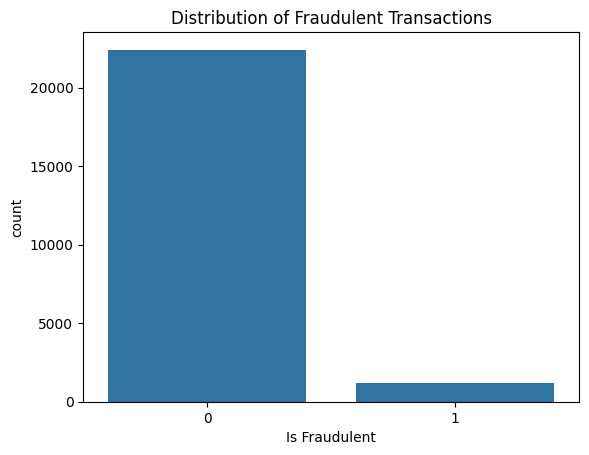

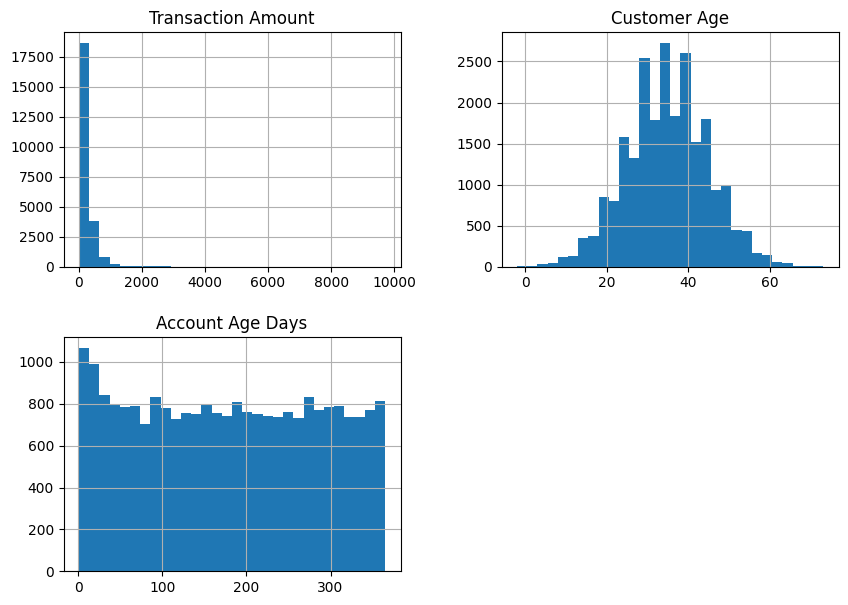

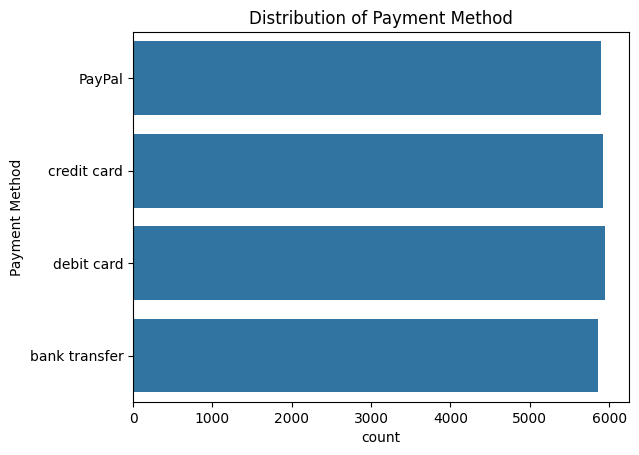

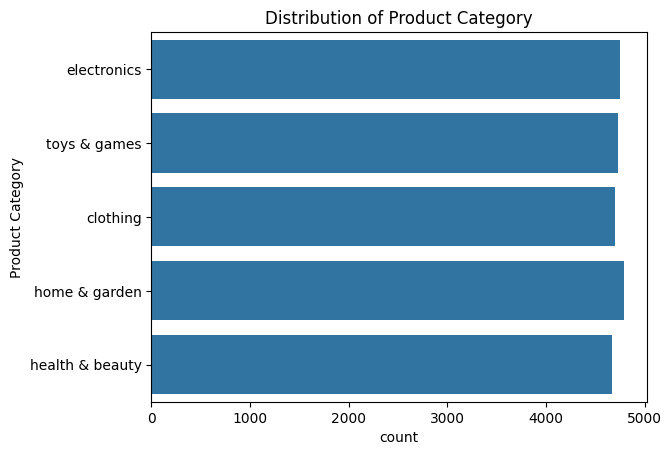

In [ ]:
# Summary statistics of the dataset
data.describe()

# Check the distribution of the target variable 'Is Fraudulent'
sns.countplot(x='Is Fraudulent', data=data)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

# Check the distribution of numerical features
numerical_features = ['Transaction Amount', 'Customer Age', 'Account Age Days']
data[numerical_features].hist(bins=30, figsize=(10, 7))
plt.show()

# Check the distribution of categorical features
categorical_features = ['Payment Method', 'Product Category']
for feature in categorical_features:
    sns.countplot(y=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.show()

## **Descriptive Analysis**

### **Question 1:** Typical Characteristics of Transactions Flagged as Fraudulent

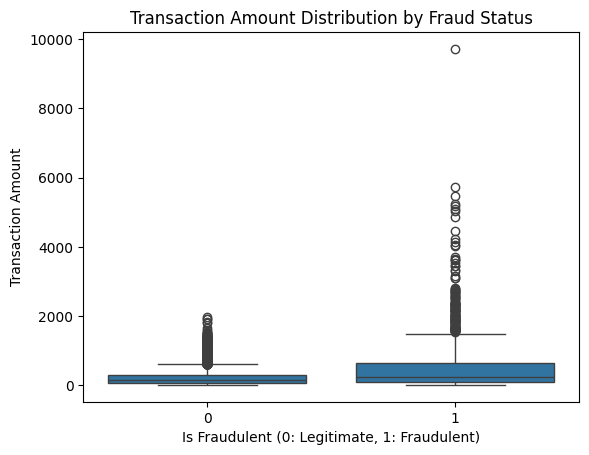

In [ ]:
# Filter the fraudulent transactions
fraudulent_data = data[data['Is Fraudulent'] == 1]

# Typical characteristics: amount, payment method, product category
fraudulent_summary = fraudulent_data[['Transaction Amount', 'Payment Method', 'Product Category']].describe(include='all')

# Display the summary
print(fraudulent_summary)

# Visualize the characteristics
sns.boxplot(x='Is Fraudulent', y='Transaction Amount', data=data)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Is Fraudulent (0: Legitimate, 1: Fraudulent)')
plt.show()

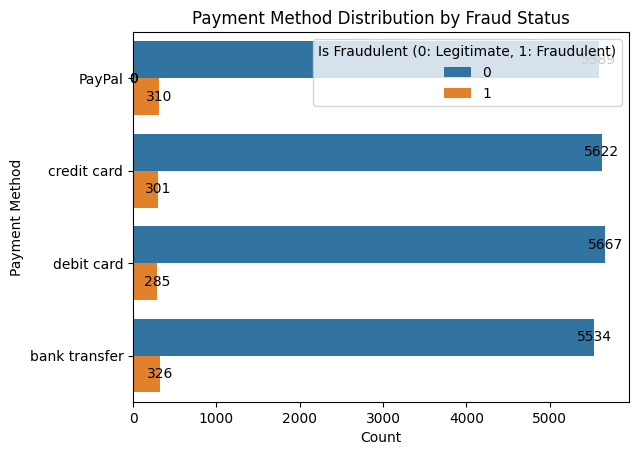

In [ ]:
# Distribution of payment method by fraud status
ax = sns.countplot(y='Payment Method', hue='Is Fraudulent', data=data)
plt.title('Payment Method Distribution by Fraud Status')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.legend(title='Is Fraudulent (0: Legitimate, 1: Fraudulent)')

# Add values at the end of each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2, f'{width:.0f}', ha='center', va='center')

plt.show()

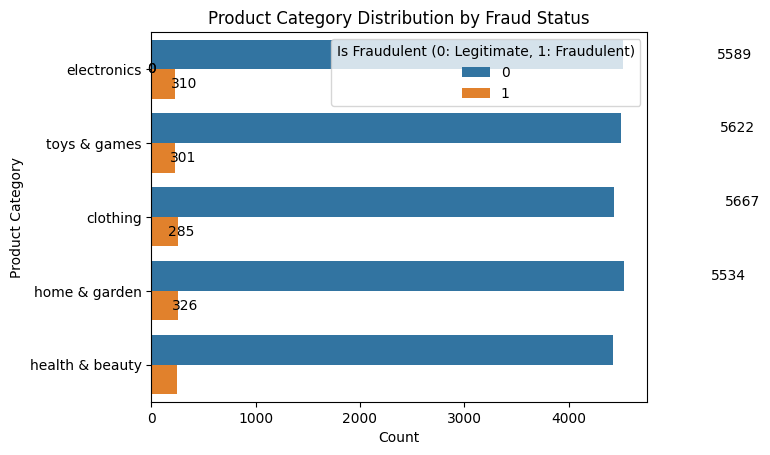

In [ ]:
# Distribution of product category by fraud status
sns.countplot(y='Product Category', hue='Is Fraudulent', data=data)
plt.title('Product Category Distribution by Fraud Status')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.legend(title='Is Fraudulent (0: Legitimate, 1: Fraudulent)')

# Add values at the end of each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2, f'{width:.0f}', ha='center', va='center')

plt.show()


### **Question 2:** Correlation of Customer Age and Account Age with Fraudulent Transactions

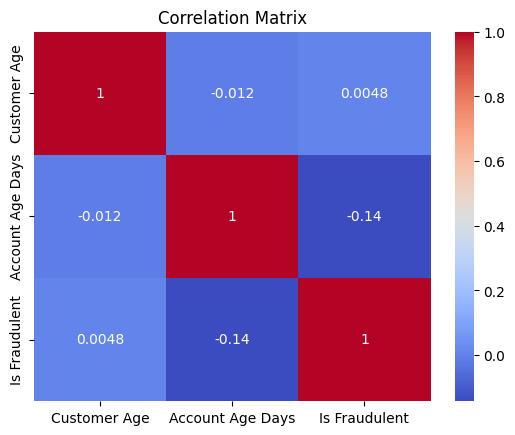

In [ ]:
# Correlation matrix
correlation_matrix = data[['Customer Age', 'Account Age Days', 'Is Fraudulent']].corr()

# Visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


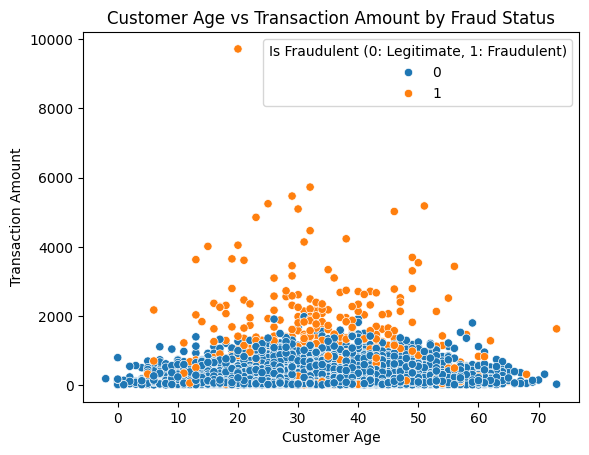

In [ ]:
# Scatter plots, Customer age vs Transaction amount by fraud status
sns.scatterplot(x='Customer Age', y='Transaction Amount', hue='Is Fraudulent', data=data)
plt.title('Customer Age vs Transaction Amount by Fraud Status')
plt.xlabel('Customer Age')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Fraudulent (0: Legitimate, 1: Fraudulent)')
plt.show()

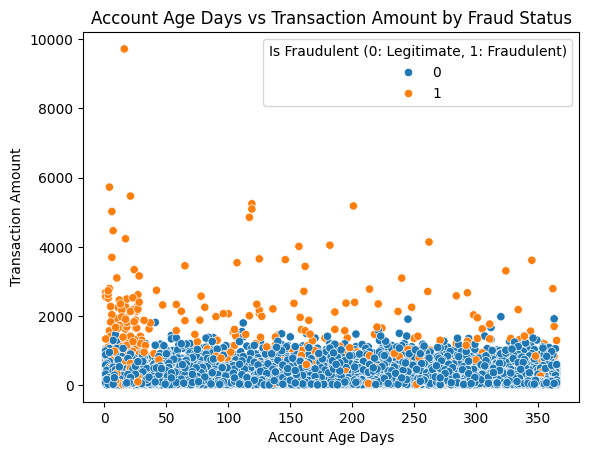

In [ ]:
# Scatter plots, account age vs Transaction amount by fraud status
sns.scatterplot(x='Account Age Days', y='Transaction Amount', hue='Is Fraudulent', data=data)
plt.title('Account Age Days vs Transaction Amount by Fraud Status')
plt.xlabel('Account Age Days')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Fraudulent (0: Legitimate, 1: Fraudulent)')
plt.show()

## **Exploratory Analysis**

### **Question 3:** Is there a pattern in the time (Transaction Hour) or date (Transaction Date) that correlates with higher frequencies of fraud?

In [ ]:
time_date_fraud = data.groupby(['Transaction Hour', 'Transaction Date']).sum()['Is Fraudulent'].reset_index()
time_date_fraud

,Transaction Hour,Transaction Date,Is Fraudulent
0,0,2024-01-01 00:01:19,0
1,0,2024-01-01 00:02:06,0
2,0,2024-01-01 00:06:18,0
3,0,2024-01-01 00:07:06,0
4,0,2024-01-01 00:09:35,0
...,...,...,...
23604,23,2024-04-06 23:33:00,0
23605,23,2024-04-06 23:34:12,0
23606,23,2024-04-06 23:37:33,0
23607,23,2024-04-06 23:54:05,0


<ipython-input-74-5c5d2f30fc34>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_fraud_1, x="Transaction Hour", y="count", palette="viridis_r")


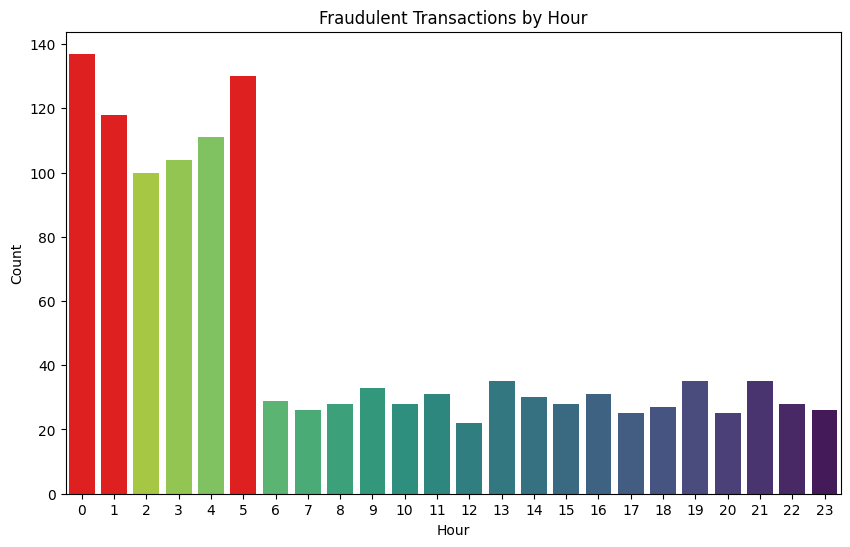

In [ ]:
time_fraud_1 = time_date_fraud[time_date_fraud["Is Fraudulent"] == 1].sort_values("Transaction Hour")
time_fraud_1.drop(columns=["Transaction Date", "Is Fraudulent"], inplace=True)
time_fraud_1 = time_fraud_1.value_counts().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=time_fraud_1, x="Transaction Hour", y="count", palette="viridis_r")
sns.barplot(data=time_fraud_1.head(3), x="Transaction Hour", y="count", color="red")
plt.title("Fraudulent Transactions by Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

In [ ]:
time_date_fraud["Transaction Date"] = pd.to_datetime(time_date_fraud["Transaction Date"], format="%Y-%m-%d %H:%M:%S")
time_date_fraud["Transaction Date"] = time_date_fraud["Transaction Date"].dt.strftime("%Y-%m")
time_date_fraud

,Transaction Hour,Transaction Date,Is Fraudulent
0,0,2024-01,0
1,0,2024-01,0
2,0,2024-01,0
3,0,2024-01,0
4,0,2024-01,0
...,...,...,...
23604,23,2024-04,0
23605,23,2024-04,0
23606,23,2024-04,0
23607,23,2024-04,0


<ipython-input-81-62244aa8d149>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=date_fraud_1, x="Transaction Date", y="count", palette="Blues_r")


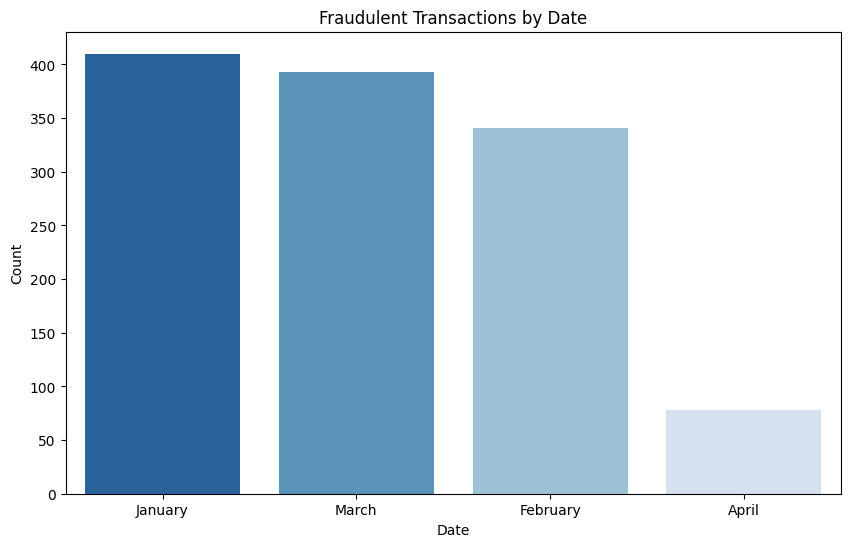

In [ ]:
date_fraud_1 = time_date_fraud[time_date_fraud["Is Fraudulent"] == 1].sort_values("Transaction Date")
date_fraud_1.drop(columns=["Transaction Hour", "Is Fraudulent"], inplace=True)
date_fraud_1 = date_fraud_1.value_counts().reset_index()
date_fraud_1["Transaction Date"] = date_fraud_1["Transaction Date"].replace({"2024-01":"January", "2024-02":"February", "2024-03":"March", "2024-04":"April"})

plt.figure(figsize=(10, 6))
sns.barplot(data=date_fraud_1, x="Transaction Date", y="count", palette="Blues_r")
plt.title("Fraudulent Transactions by Date")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

### **Question 4:** What correlations exist between the type of device used and the likelihood of a transaction being fraudulent?

In [ ]:
data["Device Used"].unique()

array(['desktop', 'tablet', 'mobile'], dtype=object)

In [ ]:
device_fraud = data[["Device Used", "Is Fraudulent"]]
device_fraud

,Device Used,Is Fraudulent
0,desktop,0
1,tablet,0
2,desktop,0
3,mobile,0
4,desktop,0
...,...,...
23629,tablet,0
23630,desktop,0
23631,tablet,0
23632,mobile,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
device_fraud_filtered = device_fraud.copy()
device_fraud_filtered["Device Used"] = le.fit_transform(device_fraud_filtered["Device Used"])
device_fraud_filtered

,Device Used,Is Fraudulent
0,0,0
1,2,0
2,0,0
3,1,0
4,0,0
...,...,...
23629,2,0
23630,0,0
23631,2,0
23632,1,0


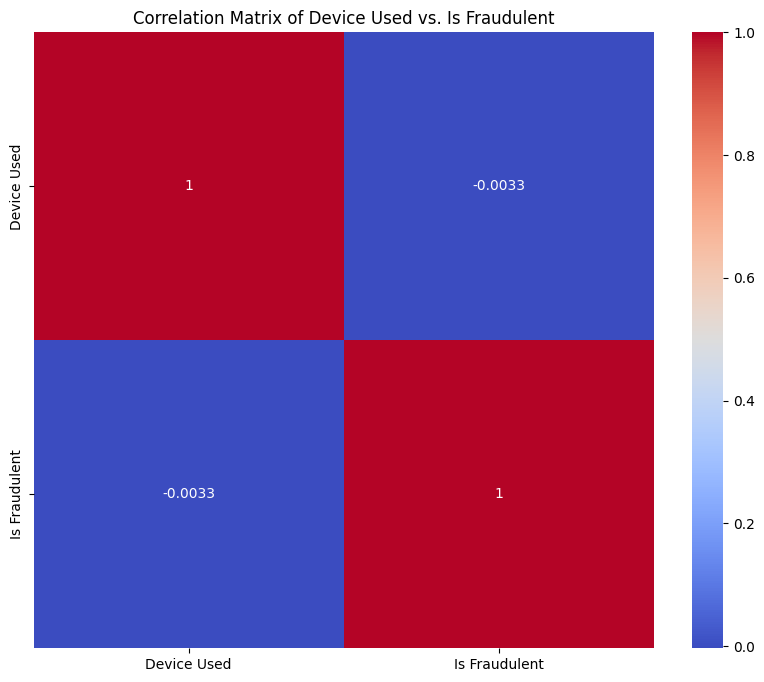

In [ ]:
device_fraud_corr = device_fraud_filtered.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(device_fraud_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Device Used vs. Is Fraudulent")
plt.show()

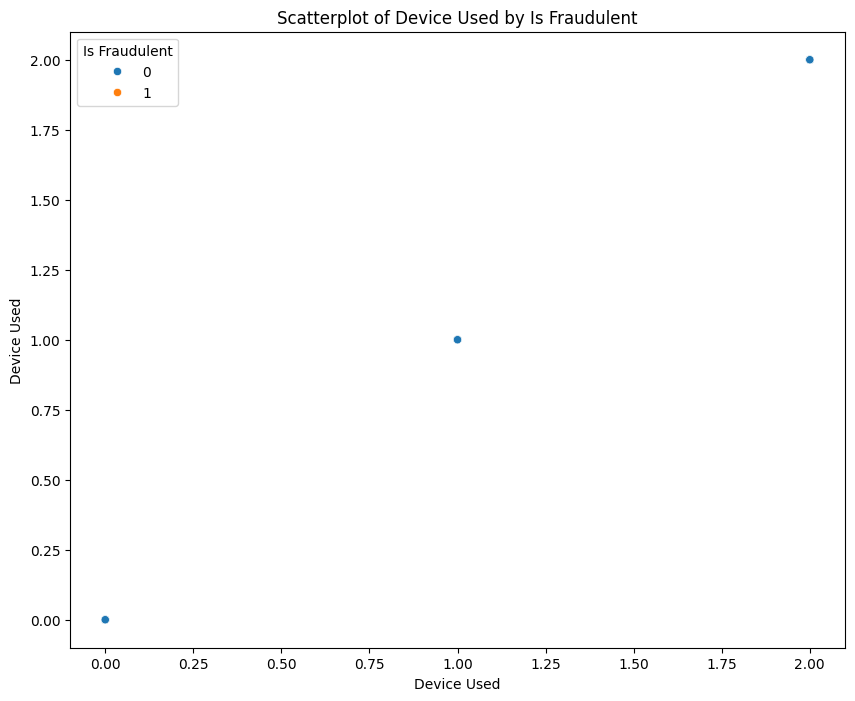

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=device_fraud_filtered, x="Device Used", y="Device Used", hue="Is Fraudulent")
plt.title("Scatterplot of Device Used by Is Fraudulent")
plt.show()

### **Question 5:** How does the distribution of fraudulent transactions vary across different customer locations and product categories?

In [ ]:
loc_product_fraud = data[["Customer Location", "Product Category", "Is Fraudulent"]].copy()
loc_product_fraud

,Customer Location,Product Category,Is Fraudulent
0,East Jameshaven,electronics,0
1,Kingstad,electronics,0
2,North Ryan,toys & games,0
3,Kaylaville,electronics,0
4,North Edwardborough,clothing,0
...,...,...,...
23629,Rebeccafurt,toys & games,0
23630,Nataliefort,clothing,0
23631,East Shannonville,health & beauty,0
23632,Lake Nicole,home & garden,0


In [ ]:
loc = loc_product_fraud["Customer Location"].value_counts().reset_index()
loc

,Customer Location,count
0,North Michael,30
1,East Michael,24
2,West Christopher,21
3,East David,20
4,Lake Michael,20
...,...,...
14863,Turnershire,1
14864,North Robertberg,1
14865,West Jacobhaven,1
14866,New Stephenshire,1


<ipython-input-168-568fce21de50>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loc.head(50), x="Customer Location", y="count", palette="mako_r")


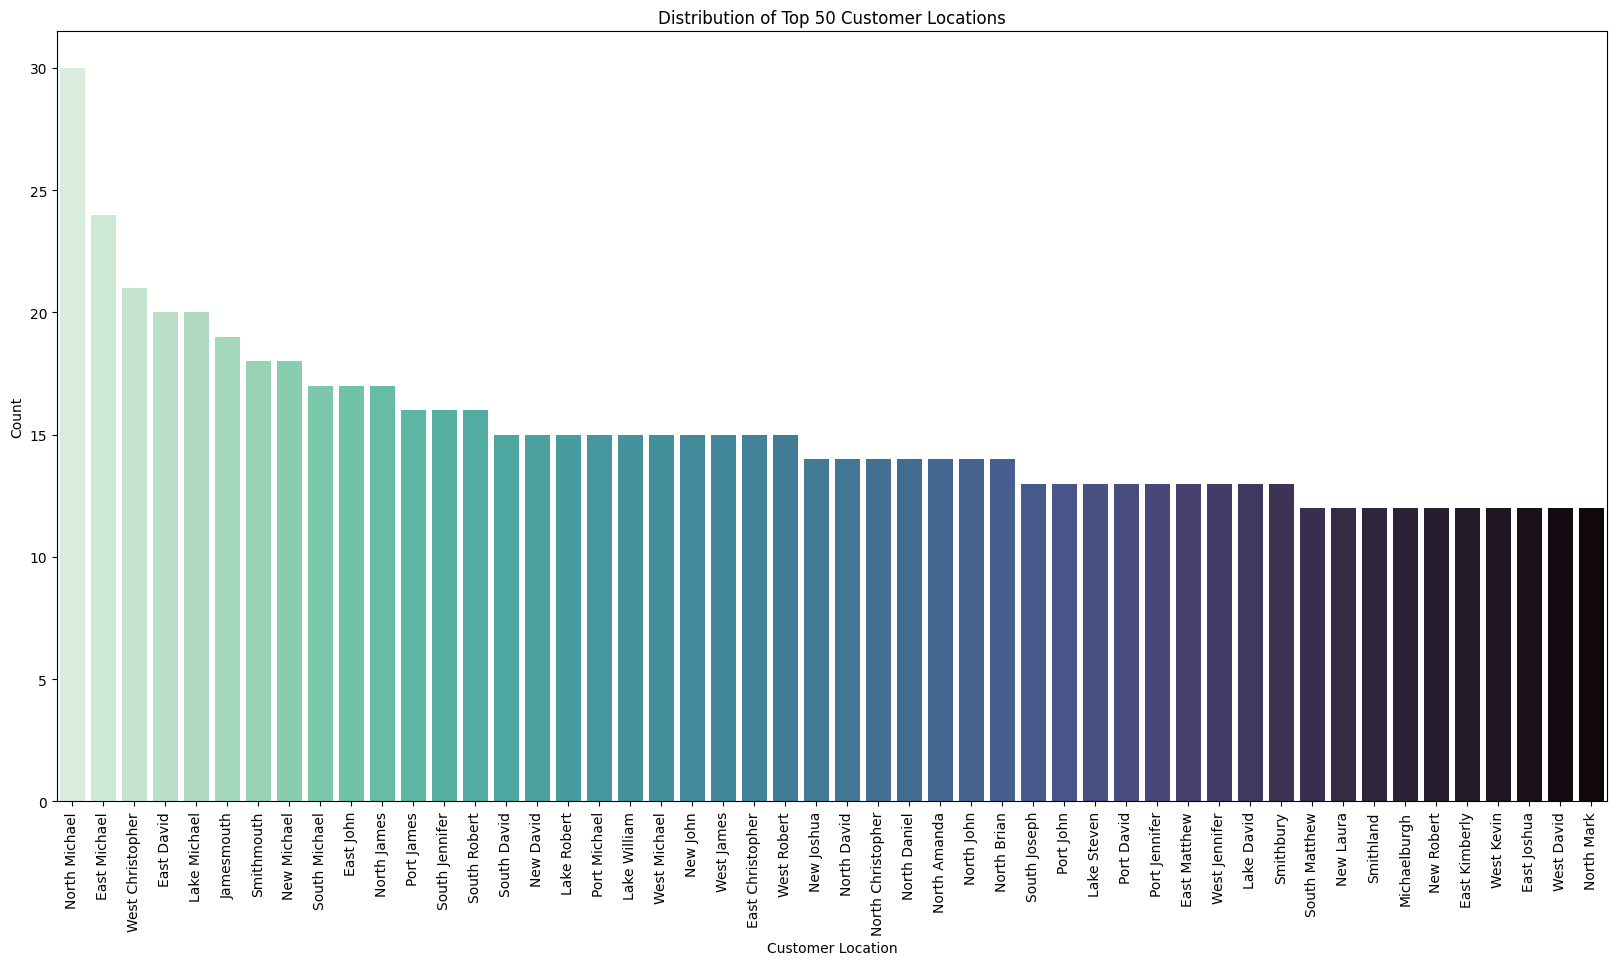

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(data=loc.head(50), x="Customer Location", y="count", palette="mako_r")
plt.title("Distribution of Top 50 Customer Locations")
plt.xlabel("Customer Location")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

<ipython-input-173-143966d1b819>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_fraud_0.drop(columns=["Is Fraudulent"], inplace=True)
<ipython-input-173-143966d1b819>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_fraud_1.drop(columns=["Is Fraudulent"], inplace=True)


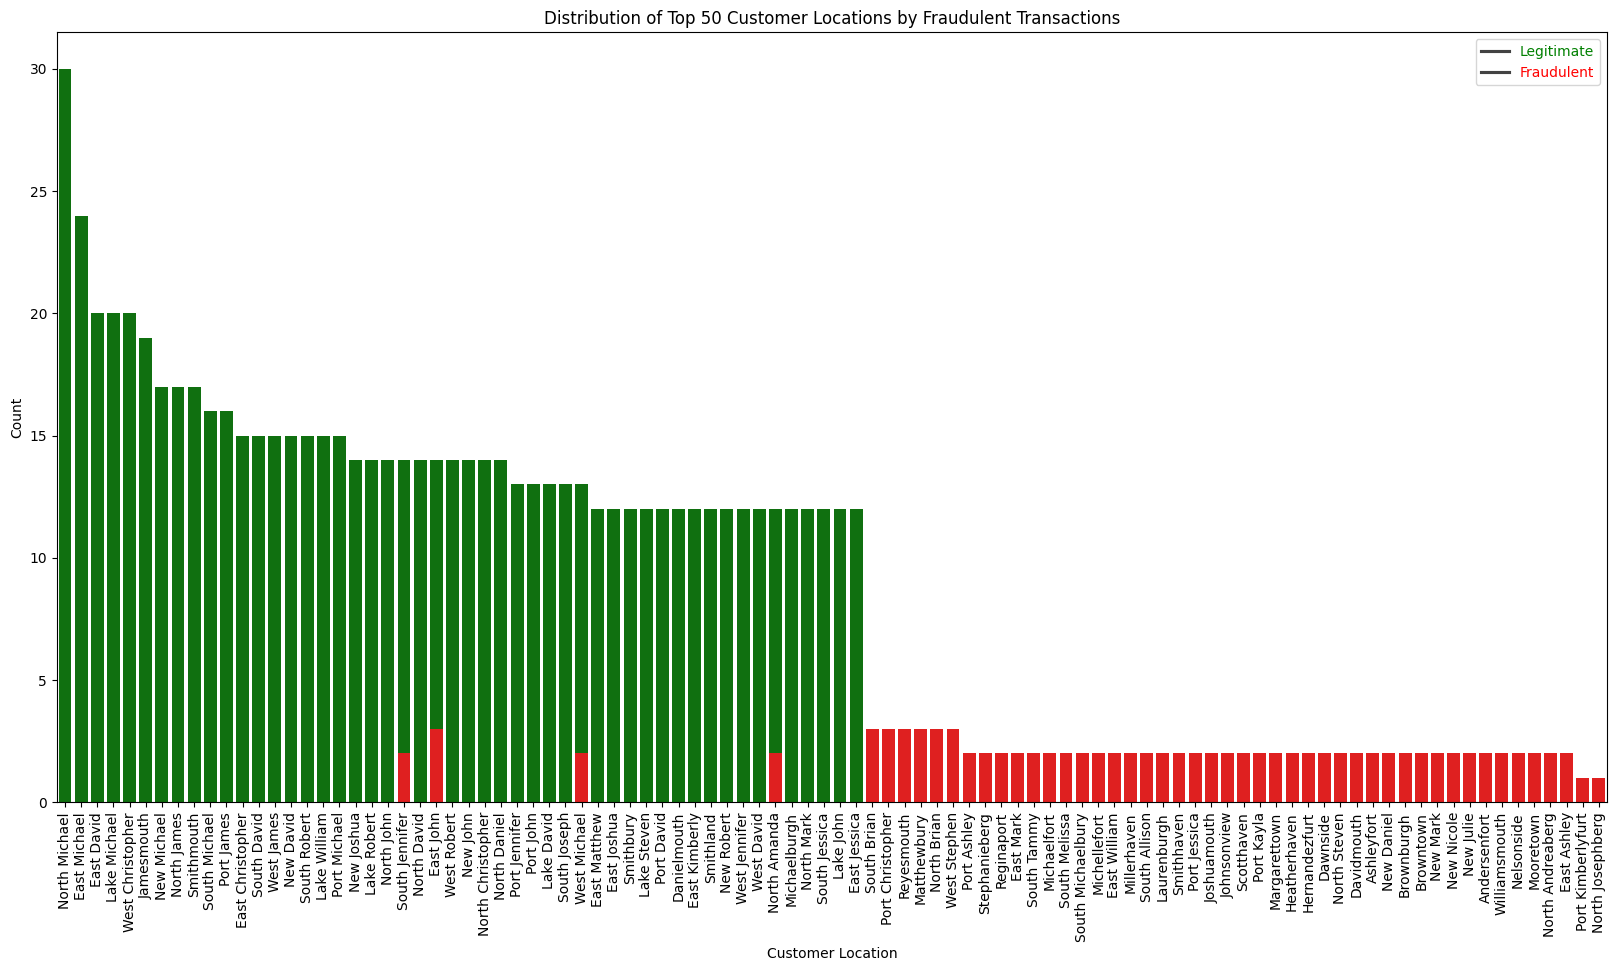

In [ ]:
loc_fraud = loc_product_fraud[["Customer Location", "Is Fraudulent"]].value_counts().reset_index()
loc_fraud_0 = loc_fraud[loc_fraud["Is Fraudulent"] == 0]
loc_fraud_0.drop(columns=["Is Fraudulent"], inplace=True)
loc_fraud_1 = loc_fraud[loc_fraud["Is Fraudulent"] == 1]
loc_fraud_1.drop(columns=["Is Fraudulent"], inplace=True)

plt.figure(figsize=(20, 10))
sns.barplot(data=loc_fraud_0.head(50), x="Customer Location", y="count", color="green")
sns.barplot(data=loc_fraud_1.head(50), x="Customer Location", y="count", color="red")
plt.title("Distribution of Top 50 Customer Locations by Fraudulent Transactions")
plt.xlabel("Customer Location")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(["Legitimate", "Fraudulent"], labelcolor=['green', 'red'])
plt.show()

In [ ]:
product = loc_product_fraud["Product Category"].value_counts().reset_index()
product

,Product Category,count
0,home & garden,4786
1,electronics,4748
2,toys & games,4730
3,clothing,4699
4,health & beauty,4671


<ipython-input-184-4b2e082b3d84>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product, x="Product Category", y="count", palette="tab10")


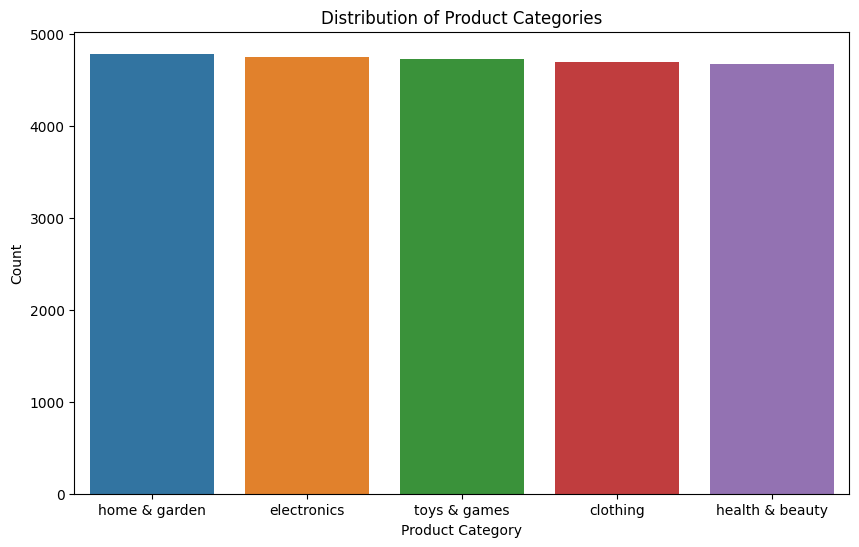

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=product, x="Product Category", y="count", palette="tab10")
plt.title("Distribution of Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()

In [ ]:
product_fraud = loc_product_fraud[["Product Category", "Is Fraudulent"]].value_counts().reset_index()
product_fraud

,Product Category,Is Fraudulent,count
0,home & garden,0,4528
1,electronics,0,4519
2,toys & games,0,4499
3,clothing,0,4439
4,health & beauty,0,4427
5,clothing,1,260
6,home & garden,1,258
7,health & beauty,1,244
8,toys & games,1,231
9,electronics,1,229


<ipython-input-195-80bcf8bd89af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_fraud_0.drop(columns=["Is Fraudulent"], inplace=True)
<ipython-input-195-80bcf8bd89af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_fraud_0, x="Product Category", y="count", palette="crest_r")


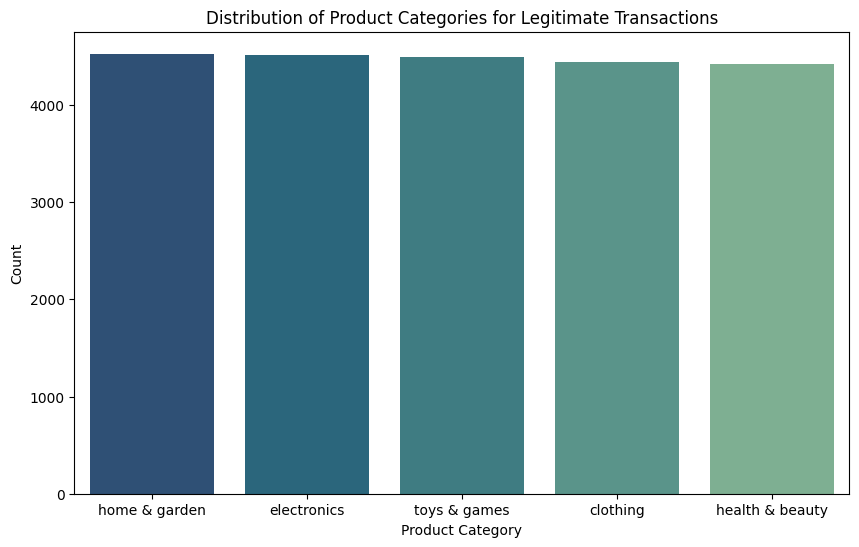

In [ ]:
product_fraud_0 = product_fraud[product_fraud["Is Fraudulent"] == 0]
product_fraud_0.drop(columns=["Is Fraudulent"], inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=product_fraud_0, x="Product Category", y="count", palette="crest_r")
plt.title("Distribution of Product Categories for Legitimate Transactions")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()

<ipython-input-198-e6678174c65a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_fraud_1.drop(columns=["Is Fraudulent"], inplace=True)
<ipython-input-198-e6678174c65a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_fraud_1, x="Product Category", y="count", palette="YlOrBr_r")


Text(0, 0.5, 'Count')

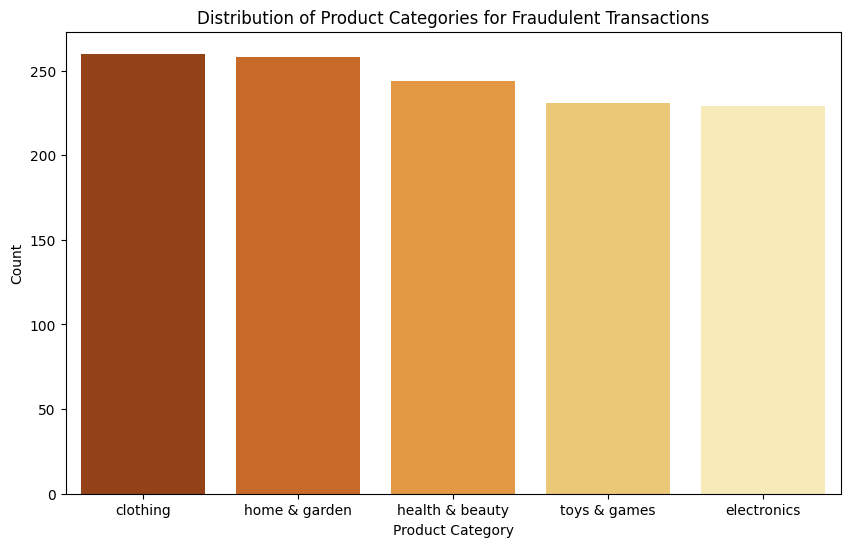

In [ ]:
product_fraud_1 = product_fraud[product_fraud["Is Fraudulent"] == 1]
product_fraud_1.drop(columns=["Is Fraudulent"], inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=product_fraud_1, x="Product Category", y="count", palette="YlOrBr_r")
plt.title("Distribution of Product Categories for Fraudulent Transactions")
plt.xlabel("Product Category")
plt.ylabel("Count")

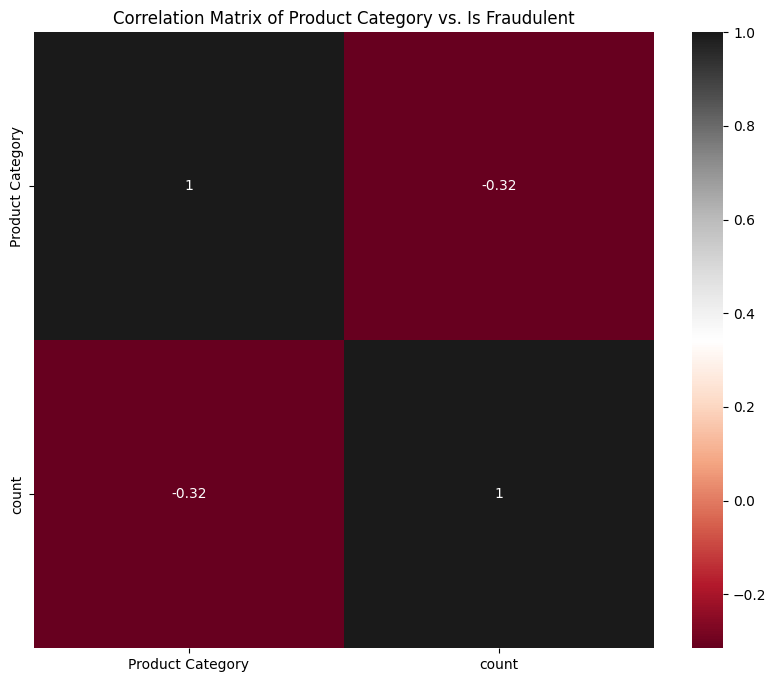

In [ ]:
product_fraud_1_filtered = product_fraud_1.copy()
product_fraud_1_filtered["Product Category"] = le.fit_transform(product_fraud_1_filtered["Product Category"])
product_fraud_1_corr = product_fraud_1_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(product_fraud_1_corr, annot=True, cmap="RdGy")
plt.title("Correlation Matrix of Product Category vs. Is Fraudulent")
plt.show()

## **Other Analysis**

### **Question 6:** Which machine learning model best predicts fraud based on multiple variables including transaction amount, customer age, and device type?

Variables: Transaction Amount, Customer Age, Device Used, Is Fraudulent

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Create a copy of the data for model preparation
model_data = data.copy()

# Normalize categorical variables in the copied data
label_encoders = {}
categorical_columns = ['Payment Method', 'Product Category', 'Customer Location', 'Device Used']

for col in categorical_columns:
    le = LabelEncoder()
    model_data[col] = le.fit_transform(model_data[col])
    label_encoders[col] = le

In [ ]:
# Standardize numerical variables in the copied data
scaler = StandardScaler()
numerical_columns = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']

model_data[numerical_columns] = scaler.fit_transform(model_data[numerical_columns])

In [ ]:
selected_features = ['Transaction Amount', 'Customer Age', 'Device Used', 'Is Fraudulent']
selected_data = model_data[selected_features]

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = selected_data.drop('Is Fraudulent', axis=1)
y = selected_data['Is Fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Define Model
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Train and evaluate classical machine learning models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print(f'--- {model_name} ---')
    print(classification_report(y_test, y_pred))
    print('AUC-ROC:', roc_auc_score(y_test, y_pred_proba))

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      6723
           1       0.23      0.13      0.17       368

    accuracy                           0.93      7091
   macro avg       0.59      0.55      0.57      7091
weighted avg       0.92      0.93      0.92      7091

AUC-ROC: 0.6097893991424636
--- SVM ---
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      6723
           1       0.85      0.10      0.17       368

    accuracy                           0.95      7091
   macro avg       0.90      0.55      0.57      7091
weighted avg       0.95      0.95      0.93      7091

AUC-ROC: 0.5414201087764908


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Train and evaluate deep learning model (Artificial Neural Network (ANN)) and build the neural network model
deep_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model
deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
deep_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
414/414 [==============================] - 2s 3ms/step - loss: 0.2627 - accuracy: 0.9433 - val_loss: 0.1766 - val_accuracy: 0.9559
Epoch 2/20
414/414 [==============================] - 1s 2ms/step - loss: 0.2130 - accuracy: 0.9491 - val_loss: 0.1707 - val_accuracy: 0.9589
Epoch 3/20
414/414 [==============================] - 1s 2ms/step - loss: 0.2064 - accuracy: 0.9499 - val_loss: 0.1709 - val_accuracy: 0.9592
Epoch 4/20
414/414 [==============================] - 1s 2ms/step - loss: 0.2066 - accuracy: 0.9500 - val_loss: 0.1674 - val_accuracy: 0.9592
Epoch 5/20
414/414 [==============================] - 1s 2ms/step - loss: 0.1985 - accuracy: 0.9512 - val_loss: 0.1661 - val_accuracy: 0.9592
Epoch 6/20
414/414 [==============================] - 1s 2ms/step - loss: 0.2007 - accuracy: 0.9503 - val_loss: 0.1666 - val_accuracy: 0.9586
Epoch 7/20
414/414 [==============================] - 1s 2ms/step - loss: 0.1981 - accuracy: 0.9508 - val_loss: 0.1658 - val_accuracy: 0.9598
Epoch 

In [ ]:
# Evaluate the model
y_pred_proba_deep = deep_model.predict(X_test).ravel()
y_pred_deep = (y_pred_proba_deep > 0.5).astype(int)

print('--- Deep Learning Model ---')
print(classification_report(y_test, y_pred_deep))
print('AUC-ROC:', roc_auc_score(y_test, y_pred_proba_deep))


222/222 [==============================] - 0s 1ms/step
--- Deep Learning Model ---
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      6723
           1       0.80      0.11      0.19       368

    accuracy                           0.95      7091
   macro avg       0.88      0.55      0.58      7091
weighted avg       0.95      0.95      0.93      7091

AUC-ROC: 0.6667705443351506


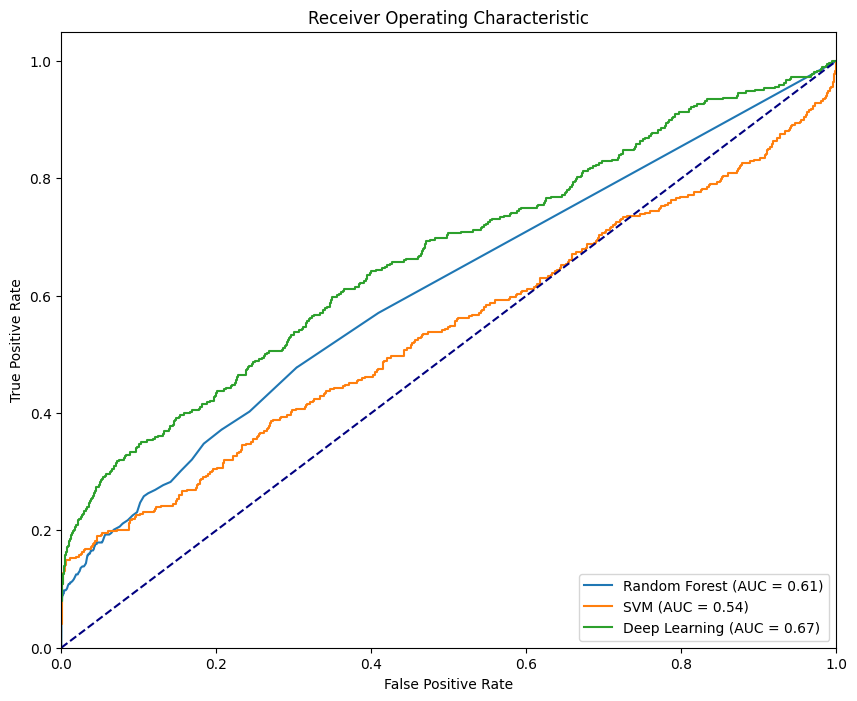

In [ ]:
from sklearn.metrics import roc_curve, auc
# Plot ROC Curves for all models
plt.figure(figsize=(10, 8))

# Plot ROC curve for Random Forest
y_pred_proba_rf = models['Random Forest'].predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot ROC curve for SVM
y_pred_proba_svm = models['SVM'].predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Plot ROC curve for Deep Learning model
fpr_deep, tpr_deep, _ = roc_curve(y_test, y_pred_proba_deep)
roc_auc_deep = auc(fpr_deep, tpr_deep)
plt.plot(fpr_deep, tpr_deep, label=f'Deep Learning (AUC = {roc_auc_deep:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Show plot
plt.show()


- Based on the results and the visualization provided, it appears that the Deep Learning model (ANN) has the highest AUC-ROC score, indicating it performs the best at predicting fraud based on the selected features which are Transaction Amount, Customer Age, and Device Used. The highest area under the curve indicates a better performance in distinguishing between fraudulent and non-fraudulent transactions.

## **Reasons Behind the Results**
1. Complexity of Patterns:

    - Deep Learning (ANN): Deep learning models, especially Artificial Neural Networks (ANNs), are powerful at capturing complex, non-linear patterns in data. The ANN can learn intricate relationships between features, which might not be easily captured by traditional models. This ability could explain why the ANN performed better in distinguishing between fraudulent and non-fraudulent transactions.
        
    - Random Forest: Random Forests are ensemble models that combine multiple decision trees. They are effective at capturing non-linear relationships to some extent but might not be as powerful as deep learning models in capturing very complex patterns.
        
    - SVM: Support Vector Machines (SVMs) are effective for linear and some non-linear classification tasks (with the right kernel). However, they might struggle with very high-dimensional and complex feature spaces, especially with a relatively small number of positive class samples (fraudulent transactions).

2. Feature Interactions:

    - Deep Learning (ANN): ANNs excel at automatically learning feature interactions through their layers and neurons. They do not require explicit feature engineering for interaction terms, as they can inherently capture these interactions.
        
    - Random Forest: While Random Forests can capture some feature interactions through their tree structures, they might not capture all complex interactions as effectively as ANNs.
        
    - SVM: SVMs might need explicit feature engineering or the use of non-linear kernels to capture interactions, which can be less efficient and less effective than the implicit learning in ANNs.
    
3. Scalability and Flexibility:

    - Deep Learning (ANN): ANNs can scale well with large amounts of data and can be tuned to add more layers and neurons to improve performance. They are flexible and can adapt to various types of data distributions and complexities.
        
    - Random Forest: Random Forests can handle large datasets and high-dimensional spaces well, but their performance might plateau with increasing complexity.
        
    - SVM: SVMs can become computationally expensive with large datasets and might not scale as well as ANNs and Random Forests for very complex problems.

4. Class Imbalance:

    - Deep Learning (ANN): Deep learning models can be trained with techniques like class weighting, oversampling, or specialized loss functions to handle class imbalances effectively.
        
    - Random Forest: Random Forests can handle class imbalance to some extent using class weights, but their performance might still be affected if the imbalance is severe.
        
    - SVM: SVMs can also use class weights to handle imbalance, but they might not be as flexible or effective as deep learning models in heavily imbalanced datasets.

5. Regularization and Overfitting:

    - Deep Learning (ANN): ANNs can use techniques like dropout (used in the provided code) to prevent overfitting and improve generalization to unseen data.
        
    - Random Forest: Random Forests use multiple trees to reduce overfitting compared to single decision trees, but might still overfit if not properly tuned.
        
    - SVM: SVMs with non-linear kernels can overfit, especially if not properly regularized. Linear SVMs might underfit complex datasets.

The deep learning model (ANN) likely performed better because it can capture complex, non-linear relationships and interactions between features more effectively than Random Forests and SVMs. The ANN's ability to automatically learn from data, combined with regularization techniques like dropout, likely contributed to its superior performance in this fraud detection task.

However, it is also important to consider that the specific tuning of hyperparameters, the architecture of the neural network, and the preprocessing steps can significantly impact the results. Further hyperparameter tuning and experimentation might improve the performance of Random Forests and SVMs as well.

### **Question 7 :** What are the common patterns in transaction amount and customer behaviors during different times of the day or week that could indicate potential fraud?
Variables: Transaction Amount, Transaction Hour, Customer Age, Is Fraudulent

In [ ]:
analysis_data = data[['Transaction Amount', 'Transaction Hour', 'Customer Age', 'Is Fraudulent']]

analysis_data.head()

,Transaction Amount,Transaction Hour,Customer Age,Is Fraudulent
0,42.32,23,40,0
1,301.34,0,35,0
2,340.32,8,29,0
3,95.77,20,45,0
4,77.45,15,42,0


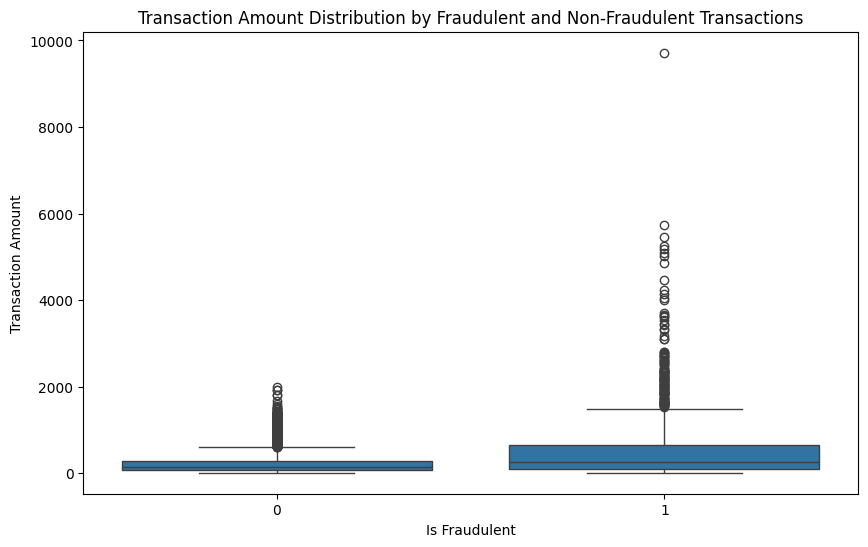

In [ ]:
#Analyze Transaction Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is Fraudulent', y='Transaction Amount', data=analysis_data)
plt.title('Transaction Amount Distribution by Fraudulent and Non-Fraudulent Transactions')
plt.show()


- Non-Fraudulent Transactions: The majority of non-fraudulent transactions have lower transaction amounts, with a few outliers reaching higher amounts.

- Fraudulent Transactions: Fraudulent transactions tend to have a wider range of transaction amounts, with several high-value outliers. This suggests that higher transaction amounts might be associated with fraudulent activities.

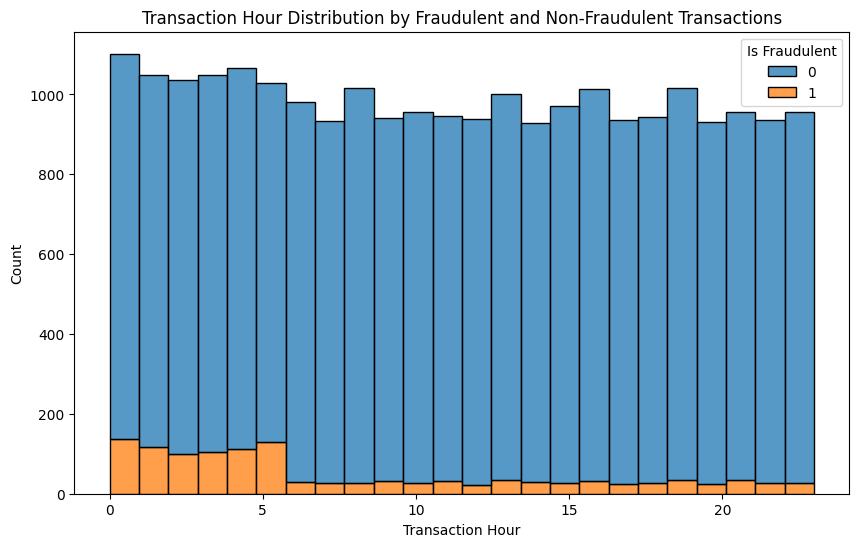

In [ ]:
#Analyze Transaction Hour

plt.figure(figsize=(10, 6))
sns.histplot(data=analysis_data, x='Transaction Hour', hue='Is Fraudulent', multiple='stack', bins=24)
plt.title('Transaction Hour Distribution by Fraudulent and Non-Fraudulent Transactions')
plt.show()


Fraudulent transactions occur at all hours of the day, but there is a noticeable concentration during the early hours (midnight to early morning). This pattern might indicate that fraudulent activities are more likely to occur during times when monitoring might be less rigorous.

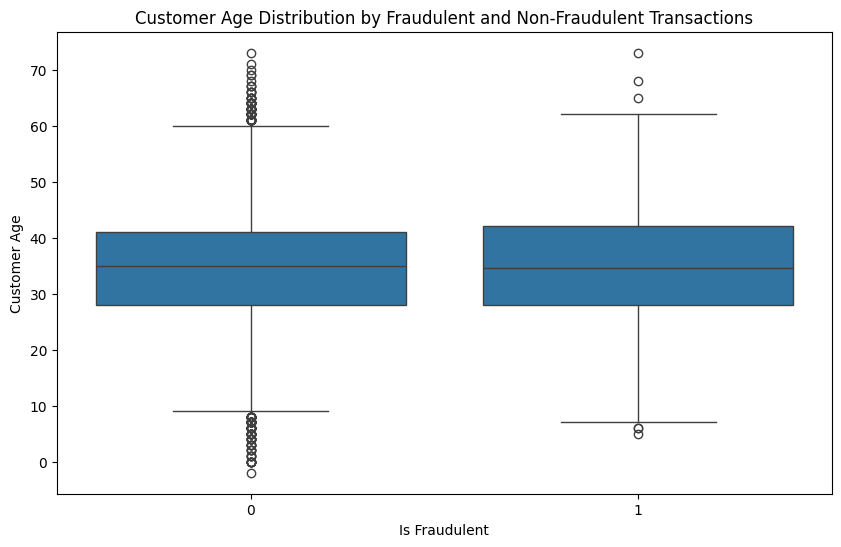

In [ ]:
#Analyze Customer Age

plt.figure(figsize=(10, 6))
sns.boxplot(x='Is Fraudulent', y='Customer Age', data=analysis_data)
plt.title('Customer Age Distribution by Fraudulent and Non-Fraudulent Transactions')
plt.show()

Non-Fraudulent Transactions: The age distribution is fairly wide, with a central tendency around middle age.
Fraudulent Transactions: The age distribution for fraudulent transactions shows a similar central tendency but with a slightly wider spread and some outliers, indicating that fraud can occur across a broad age range.

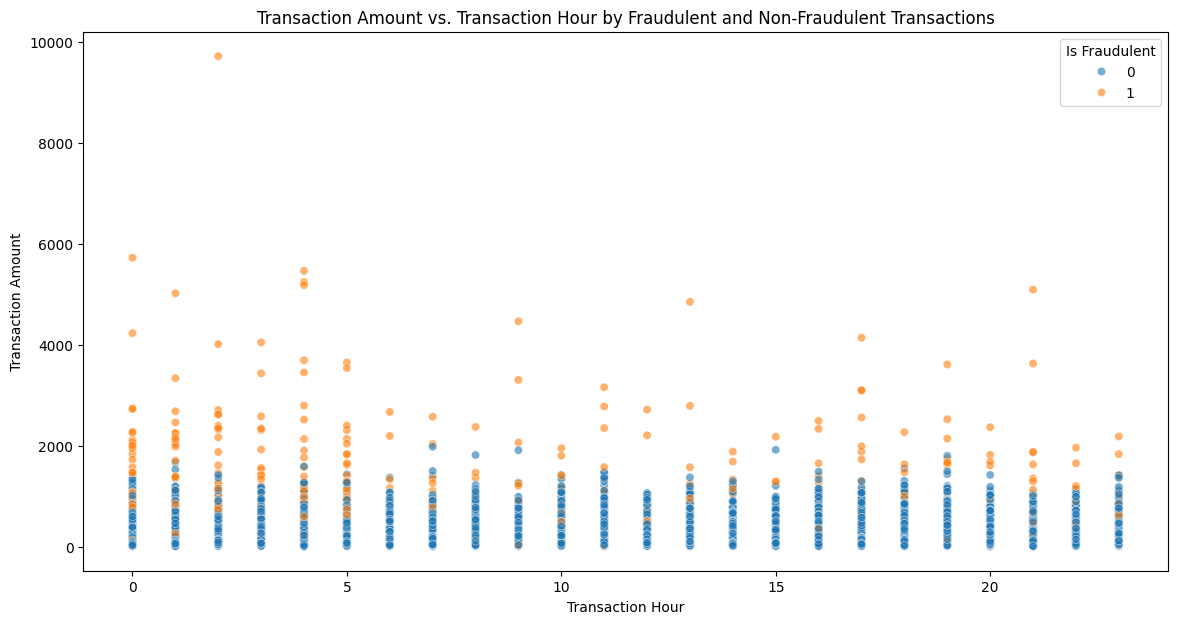

In [ ]:
#Do Combine Analysis

plt.figure(figsize=(14, 7))
sns.scatterplot(data=analysis_data, x='Transaction Hour', y='Transaction Amount', hue='Is Fraudulent', alpha=0.6)
plt.title('Transaction Amount vs. Transaction Hour by Fraudulent and Non-Fraudulent Transactions')
plt.show()

Higher transaction amounts tend to occur during certain hours of the day, and fraudulent transactions are more dispersed throughout the day with several high-value transactions.

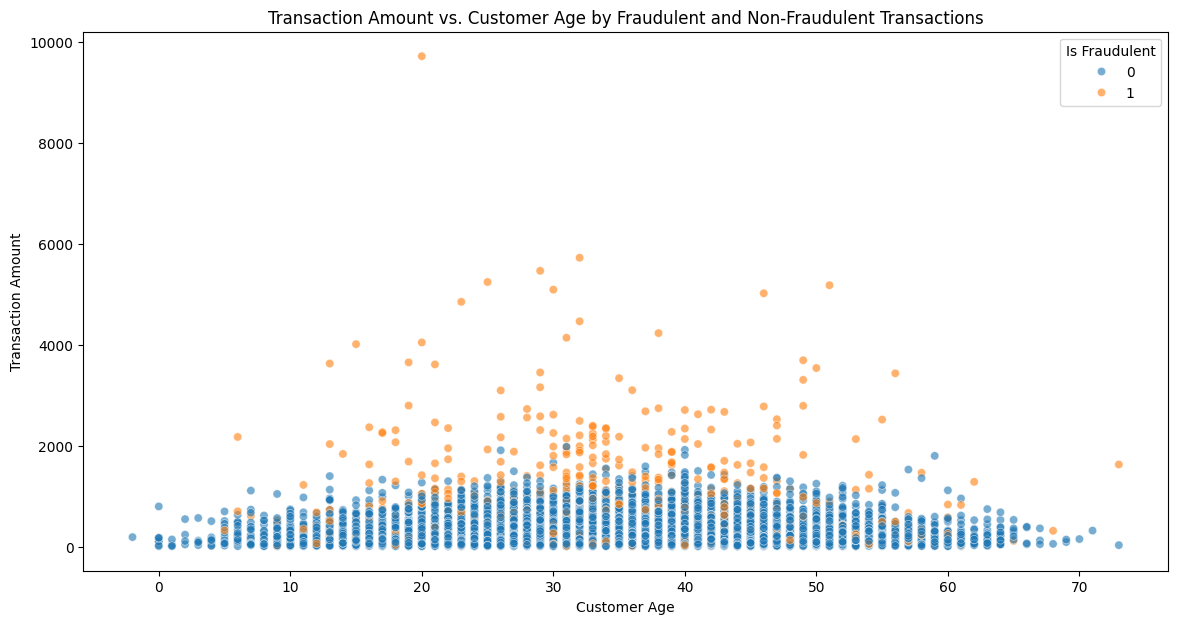

In [ ]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=analysis_data, x='Customer Age', y='Transaction Amount', hue='Is Fraudulent', alpha=0.6)
plt.title('Transaction Amount vs. Customer Age by Fraudulent and Non-Fraudulent Transactions')
plt.show()

Fraudulent transactions are spread across different ages and transaction amounts, with notable high-value transactions among various age groups.

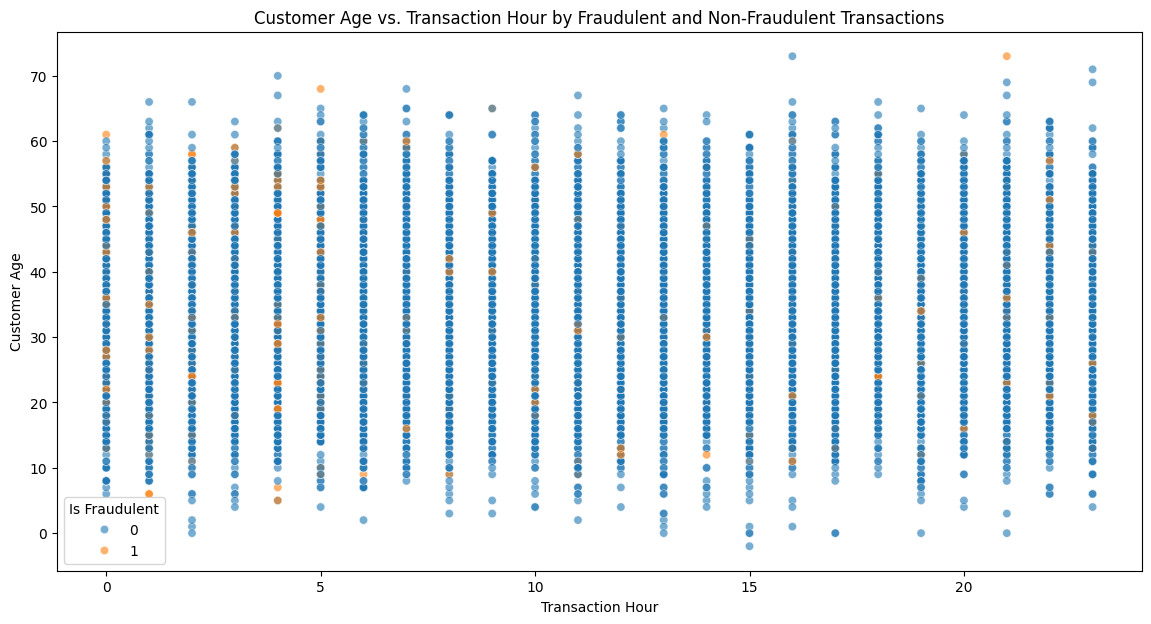

In [ ]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=analysis_data, x='Transaction Hour', y='Customer Age', hue='Is Fraudulent', alpha=0.6)
plt.title('Customer Age vs. Transaction Hour by Fraudulent and Non-Fraudulent Transactions')
plt.show()

Fraudulent transactions occur at various hours and among different age groups, indicating no strong correlation between age and time of fraudulent activity.

From the analysis we can conclude several patterns that could indicate potential fraud:
1. Higher Transaction Amounts: Fraudulent transaction usually involve higher ammounts than most of the common transaction.
2. Transaction Timing: It can be seen that a higher concentration of fraudulent transactions occur during the early hours of the day.
3. Broad Age Range: Fraudulent activities are spread across a broad range of customer ages.
4. Interactions: High transaction amounts during unusual hours, especially involving specific age groups, could be indicative of fraud.


### **Question 8 :** Can clustering techniques identify unique profiles of fraudulent transactions based on multiple features such as payment method, IP address, and shipping address?
Variables: Payment Method, IP Address, Shipping Address, Is Fraudulent

In [ ]:
clustering_data = data[['Payment Method', 'IP Address', 'Shipping Address', 'Is Fraudulent']]

label_encoders = {}
categorical_columns = ['Payment Method', 'IP Address', 'Shipping Address']

for col in categorical_columns:
    le = LabelEncoder()
    clustering_data[col] = le.fit_transform(clustering_data[col])
    label_encoders[col] = le

<ipython-input-39-3b82416b4774>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data[col] = le.fit_transform(clustering_data[col])
<ipython-input-39-3b82416b4774>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data[col] = le.fit_transform(clustering_data[col])
<ipython-input-39-3b82416b4774>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

- Convert categorical variables (Payment Method, IP Address, Shipping Address) into numerical values using LabelEncoder. This step is necessary because clustering algorithms like K-Means work with numerical data.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the range of clusters to try
range_n_clusters = list(range(2, 11))

best_n_clusters = 0
best_silhouette_score = -1

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(clustering_data)
    silhouette_avg = silhouette_score(clustering_data, cluster_labels)

    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.3f}")

    if silhouette_avg > best_silhouette_score:
        best_n_clusters = n_clusters
        best_silhouette_score = silhouette_avg

print(f"\nBest number of clusters: {best_n_clusters}")
print(f"Best silhouette score: {best_silhouette_score:.3f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the silhouette score is 0.354


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the silhouette score is 0.378


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the silhouette score is 0.406


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the silhouette score is 0.389


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the silhouette score is 0.375


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the silhouette score is 0.363


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the silhouette score is 0.362


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the silhouette score is 0.363


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the silhouette score is 0.365

Best number of clusters: 4
Best silhouette score: 0.406


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-41-ff8894659915>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Cluster'] = clusters


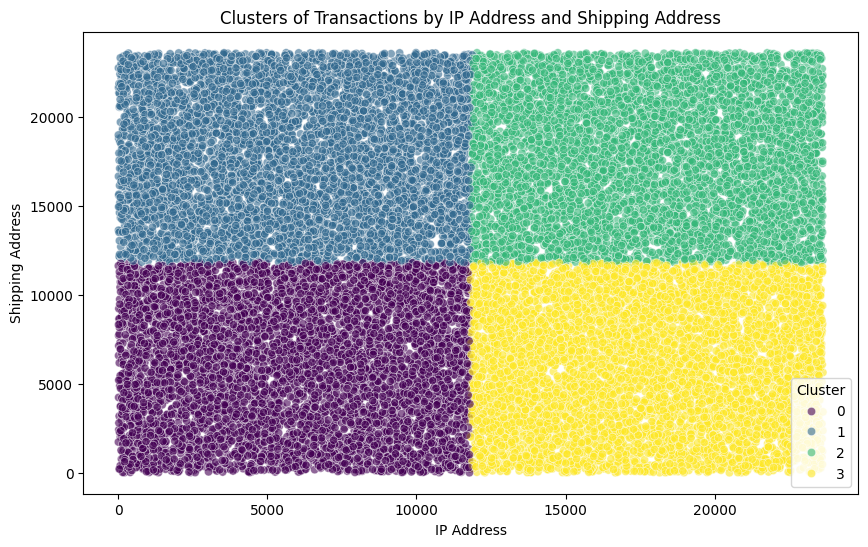

         Payment Method    IP Address  Shipping Address  Is Fraudulent
Cluster                                                               
0              1.491809   5905.086177       5904.269625       0.052730
1              1.503608   5912.897466      17771.233596       0.047323
2              1.511373  17774.088934      17688.973320       0.052677
3              1.511897  17678.837466       5922.575905       0.054122


In [ ]:
# Apply KMeans clustering with the best number of clusters
best_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
clusters = best_kmeans.fit_predict(clustering_data)

# Add the cluster labels to the original data
clustering_data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustering_data, x='IP Address', y='Shipping Address', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Clusters of Transactions by IP Address and Shipping Address')
plt.show()

# Cluster profiles
cluster_profiles = clustering_data.groupby('Cluster').mean()
print(cluster_profiles)

Outcomes from analysis:


From the clustering results, we have identified different profiles of transactions based on IP Address, Shipping Address, and Payment Method. However, the fraud rates across the clusters are relatively consistent, ranging from 4.73% to 5.41%. This indicates that while the clustering has revealed different transaction patterns, these patterns alone do not strongly differentiate fraudulent from non-fraudulent transactions.

Insights:

1. Cluster Characteristics
- Each cluster has distinct ranges of IP Address and Shipping Address values.
- The Payment Method distribution is similar across clusters.
- The fraud rate is relatively similar across clusters, suggesting that these features might not be the sole indicators of fraudulent activity.

2. Potential Unique Profiles
- Cluster 0 and Cluster 1: These clusters have lower IP Address and Shipping Address values. They might represent transactions from a specific geographical region or network segment.
- Cluster 2 and Cluster 3: These clusters have higher IP Address and Shipping Address values. They might represent transactions from another geographical region or a different network segment.

3. Fraud Detection Implications
- The consistency in fraud rates across clusters suggests that fraudulent transactions are distributed across various profiles.
- Clustering alone on these features (IP Address, Shipping Address, and Payment Method) might not be sufficient to uniquely identify fraudulent transactions.

### **Question 9 :** How does the integration of transaction hour and product category enhance the predictive accuracy of a fraud detection model?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

# Load the dataset
file_path = '/content/drive/MyDrive/BDA/Fraudulent_E-Commerce_Transaction_Data_2.csv'
data = pd.read_csv(file_path)

# Handle missing values
data.dropna(subset=['Customer Age', 'Account Age Days'], inplace=True)

# Convert categorical variables to numeric
categorical_features = ['Payment Method', 'Product Category', 'Device Used']
numerical_features = ['Transaction Amount', 'Customer Age', 'Account Age Days', 'Transaction Hour']
target = 'Is Fraudulent'

# Separate features and target
X = data[categorical_features + numerical_features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor for all features
preprocessor_all = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preprocessor without 'Transaction Hour' and 'Product Category'
num_features_without = [feature for feature in numerical_features if feature != 'Transaction Hour']
cat_features_without = [feature for feature in categorical_features if feature != 'Product Category']

preprocessor_without = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features_without),
        ('cat', OneHotEncoder(), cat_features_without)
    ])

# Preprocess the data
X_train_all = preprocessor_all.fit_transform(X_train)
X_test_all = preprocessor_all.transform(X_test)

X_train_subset = preprocessor_without.fit_transform(X_train)
X_test_subset = preprocessor_without.transform(X_test)

In [ ]:
# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Define the models with class weighting
models = {
    'ANN': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=300, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'SVM': SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
}

# Function to train and evaluate models with threshold adjustment
def train_and_evaluate(X_train, X_test, y_train, y_test, models, threshold=0.5):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_prob >= threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }
    return results

# Evaluate models
results_with = train_and_evaluate(X_train_all, X_test_all, y_train, y_test, models)
results_without = train_and_evaluate(X_train_subset, X_test_subset, y_train, y_test, models)

print("Results without 'Transaction Hour' and 'Product Category':")
print(results_without)

print("Results with 'Transaction Hour' and 'Product Category':")
print(results_with)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Results without 'Transaction Hour' and 'Product Category':
{'ANN': {'Accuracy': 0.9526126507298498, 'Precision': 0.875, 'Recall': 0.08677685950413223, 'F1 Score': 0.15789473684210525}, 'Random Forest': {'Accuracy': 0.9521895493970806, 'Precision': 0.7222222222222222, 'Recall': 0.10743801652892562, 'F1 Score': 0.18705035971223022}, 'SVM': {'Accuracy': 0.9517664480643114, 'Precision': 1.0, 'Recall': 0.05785123966942149, 'F1 Score': 0.109375}}
Results with 'Transaction Hour' and 'Product Category':
{'ANN': {'Accuracy': 0.9443621747408504, 'Precision': 0.4132231404958678, 'Recall': 0.2066115702479339, 'F1 Score': 0.27548209366391185}, 'Random Forest': {'Accuracy': 0.9517664480643114, 'Precision': 0.71875, 'Recall': 0.09504132231404959, 'F1 Score': 0.16788321167883213}, 'SVM': {'Accuracy': 0.9526126507298498, 'Precision': 0.9090909090909091, 'Recall': 0.08264462809917356, 'F1 Score': 0.1515151515151515}}


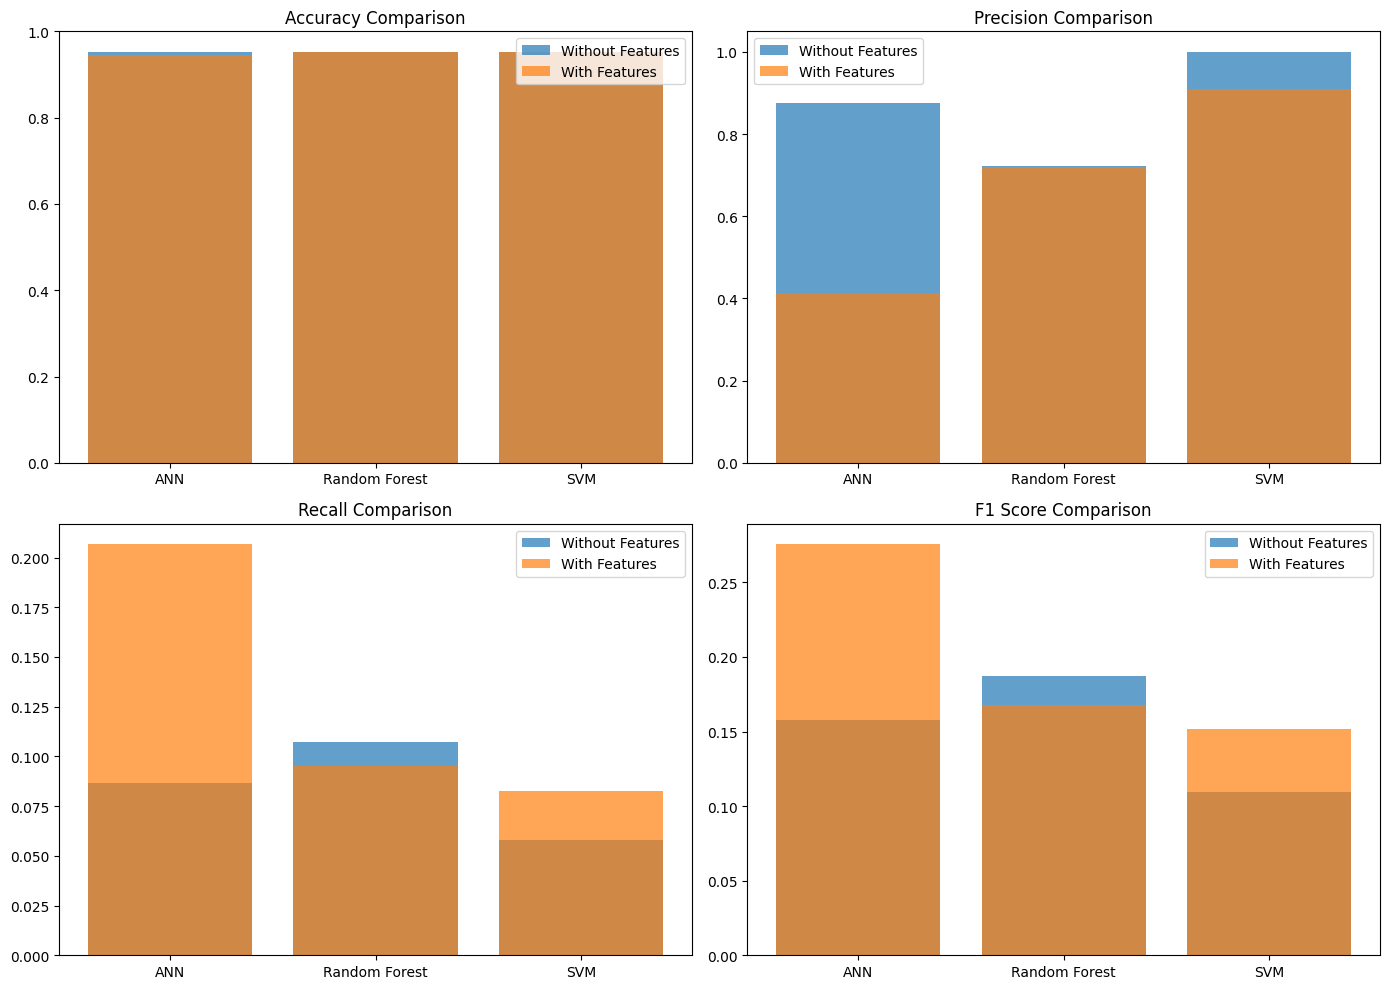

In [ ]:
# Plotting the results for Question 9
results_df_without = pd.DataFrame(results_without).T
results_df_with = pd.DataFrame(results_with).T

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot accuracy
axes[0, 0].bar(results_df_without.index, results_df_without['Accuracy'], label='Without Features', alpha=0.7)
axes[0, 0].bar(results_df_with.index, results_df_with['Accuracy'], label='With Features', alpha=0.7)
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].legend()

# Plot precision
axes[0, 1].bar(results_df_without.index, results_df_without['Precision'], label='Without Features', alpha=0.7)
axes[0, 1].bar(results_df_with.index, results_df_with['Precision'], label='With Features', alpha=0.7)
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].legend()

# Plot recall
axes[1, 0].bar(results_df_without.index, results_df_without['Recall'], label='Without Features', alpha=0.7)
axes[1, 0].bar(results_df_with.index, results_df_with['Recall'], label='With Features', alpha=0.7)
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].legend()

# Plot F1 Score
axes[1, 1].bar(results_df_without.index, results_df_without['F1 Score'], label='Without Features', alpha=0.7)
axes[1, 1].bar(results_df_with.index, results_df_with['F1 Score'], label='With Features', alpha=0.7)
axes[1, 1].set_title('F1 Score Comparison')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

### **Question 10** : What impact does variable selection have on the performance of fraud detection algorithms in terms of precision and recall?

*   Since variable selection has already been applied to question 9, we extract the precision and recall from the results of question 9 and analyze it.

In [ ]:
# Extract precision and recall for models with and without the features
precision_with_features = {model: results_with[model]['Precision'] for model in results_with}
recall_with_features = {model: results_with[model]['Recall'] for model in results_with}

precision_without_features = {model: results_without[model]['Precision'] for model in results_without}
recall_without_features = {model: results_without[model]['Recall'] for model in results_without}

# Print extracted results
print("Precision with all features:", precision_with_features)
print("Recall with all features:", recall_with_features)
print("Precision without 'Transaction Hour' and 'Product Category':", precision_without_features)
print("Recall without 'Transaction Hour' and 'Product Category':", recall_without_features)

Precision with all features: {'ANN': 0.4132231404958678, 'Random Forest': 0.71875, 'SVM': 0.9090909090909091}
Recall with all features: {'ANN': 0.2066115702479339, 'Random Forest': 0.09504132231404959, 'SVM': 0.08264462809917356}
Precision without 'Transaction Hour' and 'Product Category': {'ANN': 0.875, 'Random Forest': 0.7222222222222222, 'SVM': 1.0}
Recall without 'Transaction Hour' and 'Product Category': {'ANN': 0.08677685950413223, 'Random Forest': 0.10743801652892562, 'SVM': 0.05785123966942149}


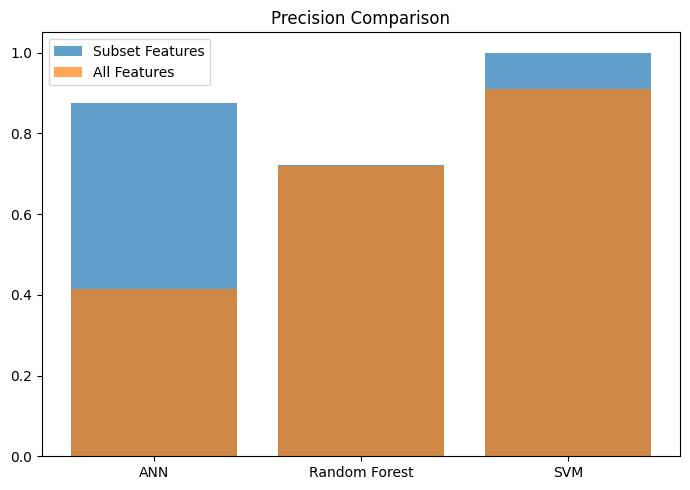

In [ ]:
# Plot precision for Precision
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(precision_without_features.keys(), precision_without_features.values(), label='Subset Features', alpha=0.7)
ax.bar(precision_with_features.keys(), precision_with_features.values(), label='All Features', alpha=0.7)
ax.set_title('Precision Comparison')
ax.legend()
plt.tight_layout()
plt.show()


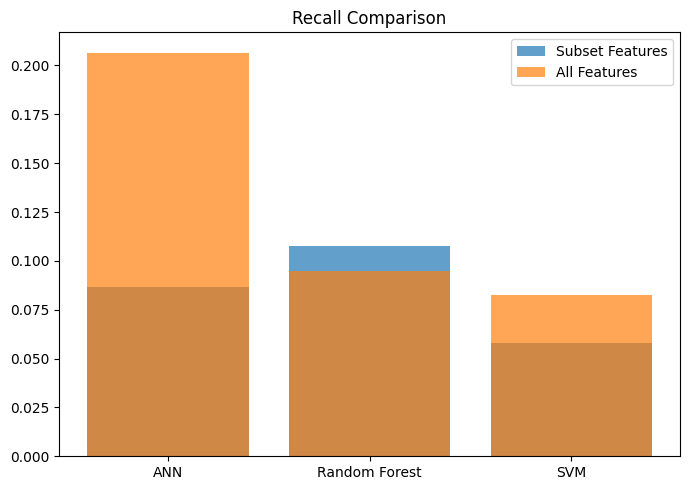

In [ ]:
# Plot recall for Recall
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(recall_without_features.keys(), recall_without_features.values(), label='Subset Features', alpha=0.7)
ax.bar(recall_with_features.keys(), recall_with_features.values(), label='All Features', alpha=0.7)
ax.set_title('Recall Comparison')
ax.legend()
plt.tight_layout()
plt.show()

### **Question 11**: Develop a fraud prediction model using random forest and compare its performance when trained on different subsets of features.

**Feature Selection**:
Dropping Transaction ID, Customer ID, Transaction Date, Customer Location, Shipping Address, Billing Address, and IP Address to focus on our goal.

In [ ]:
# Feature Selection
data = data.drop(["Transaction ID","Customer ID","Customer Location", "Transaction Date",
              "IP Address","Shipping Address","Billing Address"], axis=1)

data.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour
0,42.32,PayPal,electronics,1,40,desktop,0,282,23
1,301.34,credit card,electronics,3,35,tablet,0,223,0
2,340.32,debit card,toys & games,5,29,desktop,0,360,8
3,95.77,credit card,electronics,5,45,mobile,0,325,20
4,77.45,credit card,clothing,5,42,desktop,0,116,15


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Payment Method', 'Product Category', 'Device Used']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['Transaction Amount', 'Customer Age', 'Quantity', 'Account Age Days', 'Transaction Hour']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

<Axes: >

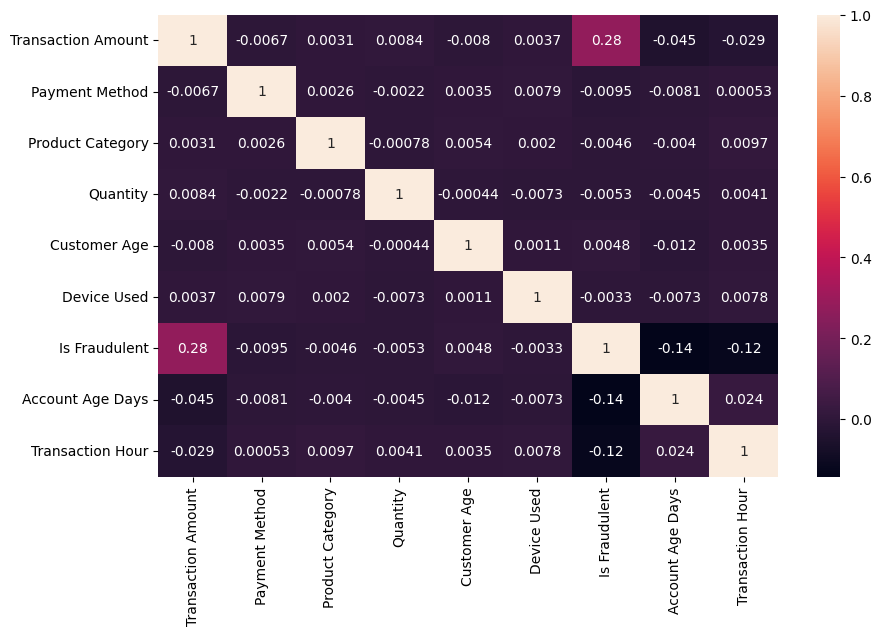

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

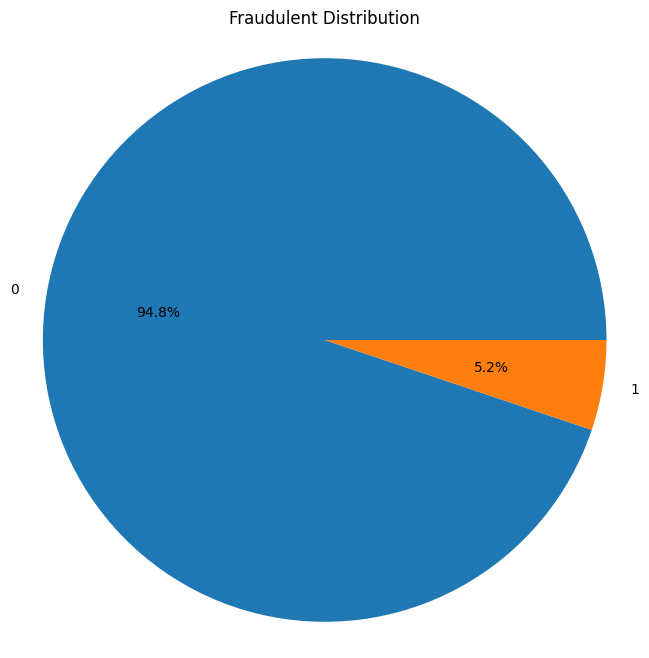

In [ ]:
# Show fraudulent distribution
plt.figure(figsize=(8, 8))
plt.pie(data['Is Fraudulent'].value_counts(), labels=data['Is Fraudulent'].unique(), autopct='%1.1f%%')
plt.title('Fraudulent Distribution')
plt.axis('equal')
plt.show()

Handling Imbalance

In [ ]:
!pip install imblearn

In [ ]:
X = data.drop('Is Fraudulent', axis=1)
y = data['Is Fraudulent']
X.shape, y.shape

((23634, 8), (23634,))

In [ ]:
# Applying Random Under Sampler
from sklearn.utils import resample

# Concatenate the data
data_resampled = pd.concat([X, y], axis=1)

# Separate majority and minority classes
majority_class = data_resampled[data_resampled['Is Fraudulent'] == 0]
minority_class = data_resampled[data_resampled['Is Fraudulent'] == 1]

# Downsample majority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class),
                                random_state=42)

# Combine minority class with downsampled majority class
downsampled_data = pd.concat([minority_class, majority_downsampled])

# Separate features and target variable
X_downsampled = downsampled_data.drop('Is Fraudulent', axis=1)
y_downsampled = downsampled_data['Is Fraudulent']

X_downsampled.shape, y_downsampled.shape

((2444, 8), (2444,))

Model Training and Evaluation - **Full Features**

In [ ]:
# Random Forest with Random Under Sampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_downsampled, y_downsampled, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=1234)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       241
           1       0.77      0.68      0.72       248

    accuracy                           0.73       489
   macro avg       0.74      0.73      0.73       489
weighted avg       0.74      0.73      0.73       489



In [ ]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print(X_resampled.shape,y_resampled.shape)

(44824, 8) (44824,)


In [ ]:
# Random Forest with SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=1234)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4555
           1       0.96      0.97      0.96      4410

    accuracy                           0.96      8965
   macro avg       0.96      0.96      0.96      8965
weighted avg       0.96      0.96      0.96      8965



Model Training and Evaluation - **Second Subset of Features**

In [ ]:
# Define the second subset of features
second_subset_features = ['Transaction Amount', 'Payment Method', 'Product Category', 'Quantity', 'Customer Age']

# Extract the second subset of features
X_second_subset = X[second_subset_features]

# Apply SMOTE to the second subset of features
smote = SMOTE()
X_resampled_second, y_resampled_second = smote.fit_resample(X_second_subset, y)
print(X_resampled_second.shape,y_resampled_second.shape)

(44824, 5) (44824,)


In [ ]:
# Random Forest with second subset features
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(X_resampled_second, y_resampled_second, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=1234)
model.fit(X_train_second,y_train_second)
y_pred_second = model.predict(X_test_second)
print(classification_report(y_test_second,y_pred_second))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      4555
           1       0.92      0.91      0.91      4410

    accuracy                           0.92      8965
   macro avg       0.92      0.92      0.92      8965
weighted avg       0.92      0.92      0.92      8965



Model Performance Comparison

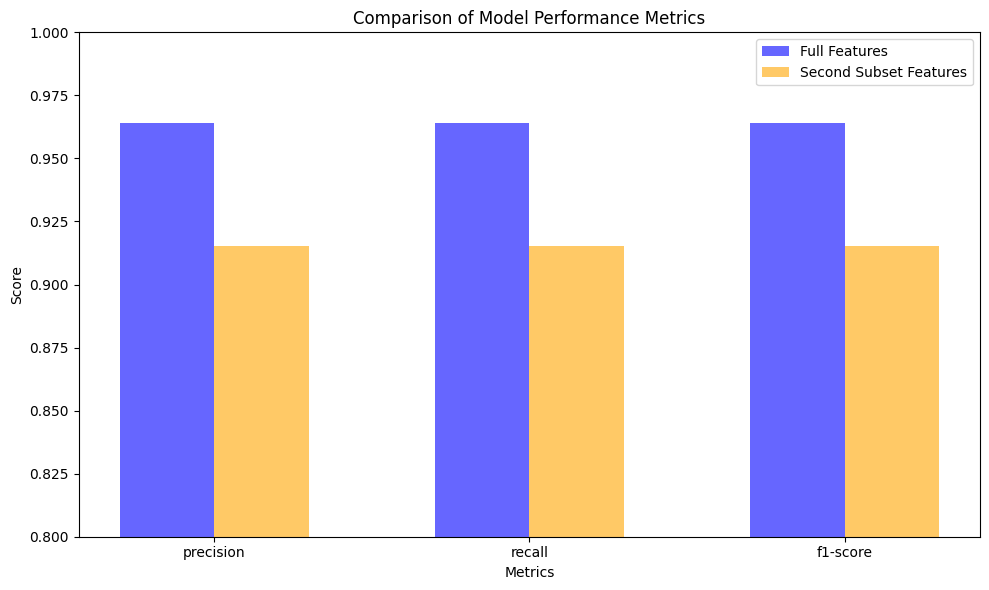

In [ ]:
report_full_features = classification_report(y_test, y_pred, output_dict=True)
report_second_subset = classification_report(y_test_second, y_pred_second, output_dict=True)

# Create DataFrames for visualization
df_full_features = pd.DataFrame(report_full_features).transpose()
df_second_subset = pd.DataFrame(report_second_subset).transpose()

# Extract average metrics for visualization
metrics = ['precision', 'recall', 'f1-score']
average_full_features_metrics = [df_full_features.loc['weighted avg', metric] for metric in metrics]
average_second_subset_metrics = [df_second_subset.loc['weighted avg', metric] for metric in metrics]

# Plot comparison
bar_width = 0.3
index = np.arange(len(metrics))
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(index, average_full_features_metrics, bar_width, alpha=0.6, label='Full Features', color='blue')
ax.bar(index + bar_width, average_second_subset_metrics, bar_width, alpha=0.6, label='Second Subset Features', color='orange')

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.set_ylim(0.8, 1)
ax.legend()

plt.tight_layout()
plt.show()

### **Question 12**: Evaluate the effectiveness of anomaly detection algorithms in identifying outliers in transaction patterns that could signify fraud.

Algorithms used:

1.   Isolation Forest
2.   Local Outlier Factor
3.   One-Class SVM



In [ ]:
# Isolation Forest
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix

# Split the data into features and target variable
X = data.drop('Is Fraudulent', axis=1)
y = data['Is Fraudulent']

# Implement Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
y_pred_iso = iso_forest.fit_predict(X)

# Convert predictions to binary outcomes: 1 for inliers, -1 for outliers
# Assuming -1 as fraud and 1 as non-fraud
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

print(classification_report(y ,y_pred_iso))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      1.00      0.97     22412
           1       0.57      0.11      0.19      1222

    accuracy                           0.95     23634
   macro avg       0.76      0.55      0.58     23634
weighted avg       0.93      0.95      0.93     23634



In [ ]:
# Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_lof = lof.fit_predict(X)

# Convert predictions to binary outcomes: 1 for inliers, -1 for outliers
# Assuming -1 as fraud and 1 as non-fraud
y_pred_lof = [1 if x == -1 else 0 for x in y_pred_lof]

print(classification_report(y ,y_pred_lof))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     22412
           1       0.22      0.04      0.07      1222

    accuracy                           0.94     23634
   macro avg       0.59      0.52      0.52     23634
weighted avg       0.91      0.94      0.92     23634



In [ ]:
# One-Class SVM
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=0.01, kernel='rbf', gamma=0.1)
y_pred_svm = one_class_svm.fit_predict(X)

# Convert predictions to binary outcomes: 1 for inliers, -1 for outliers
# Assuming -1 as fraud and 1 as non-fraud
y_pred_svm = [1 if x == -1 else 0 for x in y_pred_svm]

print(classification_report(y ,y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     22412
           1       0.38      0.08      0.13      1222

    accuracy                           0.95     23634
   macro avg       0.67      0.53      0.55     23634
weighted avg       0.92      0.95      0.93     23634

